# **Data Cleaning**
Pembersihan data selalu menjadi langkah pertama dalam setiap proyek ilmu data. Meskipun data di sini tampak bersih, beberapa perubahan kecil diperlukan.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
nutrients=pd.read_csv("/content/nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


Hal pertama yang terpenting, dalam data menyatakan jumlah yang sangat kecil sehingga sebaiknya kita menggantinya dengan 0.

In [ ]:
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


Sekarang, kita perlu menghapus semua ekspresi seperti koma dari kumpulan data untuk mengonversi data numerik ke variabel integer atau float yang sesuai.

In [ ]:
# Menghapus tanda koma dari semua kolom
nutrients = nutrients.replace(",", "", regex=True)

# Mengganti huruf 'a' pada kolom 'Fiber' dengan string kosong
nutrients['Fiber'] = nutrients['Fiber'].replace("a", "", regex=True)

# Mengubah nilai pada baris ke-91 pada kolom 'Calories' menggunakan .loc
nutrients.loc[91, 'Calories'] = (8 + 44) / 2


Sekarang, mari kita ubah tipe data gram, kalori, protein, lemak, lemak jenuh, serat dan karbohidrat ke int.

In [ ]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [ ]:
nutrients.dtypes

,0
Food,object
Measure,object
Grams,int64
Calories,float64
Protein,int64
Fat,int64
Sat.Fat,float64
Fiber,float64
Carbs,float64
Category,object


Bagus, semua data Anda berada dalam tipe data yang diinginkan.

# **Quick last checks on data quality**

In [ ]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

Ada nilai nol di kolom fiber, mari hilangkan baris tersebut sepenuhnya.

In [ ]:
nutrients=nutrients.dropna()
nutrients.shape

(331, 10)

# **Data Visualization and Analysis**

<ipython-input-17-5507f38b0e16>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-17-5507f38b0e16>:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-17-5507f38b0e16>:22: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-17-5507f38b0e16>:27: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-17-5507f38b0e16>:32: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-17-5507f38b0e16

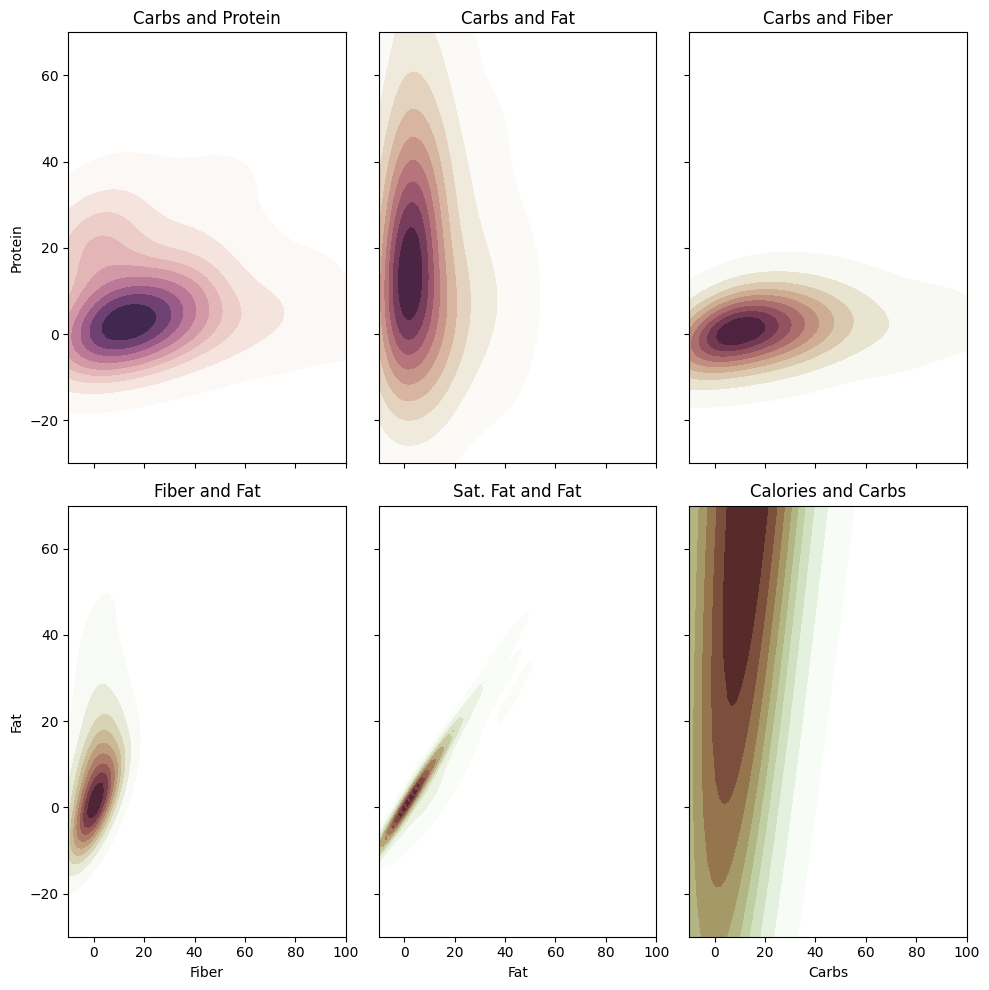

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup grid plot
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)

# Plot Carbs vs Protein
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Protein'], cmap=cmap, shade=True, ax=axes[0,0])
axes[0,0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

# Plot Carbs vs Fat
cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fat'], y=nutrients['Carbs'], cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

# Plot Carbs vs Fiber
cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fiber'], cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fiber')

# Plot Fiber vs Fat
cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fiber'], y=nutrients['Fat'], cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

# Plot Fat vs Sat.Fat
cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fat'], y=nutrients['Sat.Fat'], cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

# Plot Carbs vs Calories
cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Calories'], cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

# Adjust layout
f.tight_layout()
plt.show()

# Let's dive into individual metrics
Apa makanan paling kaya protein dalam kategori sayur-sayuran dan biji-bijian?

In [ ]:
alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

Oleh karena itu, dari kategori Biji-bijian, Sayuran, dan Biji-bijian, gandum utuh memiliki kandungan protein paling banyak diikuti oleh roti putih. Kacang kedelai juga berada di peringkat 20 teratas. Selain itu, Kacang Almond berada di peringkat 1 dalam kategori Biji-bijian.🌱

# Foods to stay away from:
Makanan apa yang memiliki kalori paling banyak?

In [ ]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

Fortified milk has the most calories, followed by white bread. Also, notice how whole wheat has the most proteins but has almost equal amount of calories. Lard is fat source with most calories and 1/2 cup of ice-creams tops the charts in the dessert category.

Susu yang difortifikasi mengandung kalori paling banyak, diikuti oleh roti putih. Perhatikan juga bagaimana gandum utuh mengandung protein paling banyak tetapi memiliki jumlah kalori yang hampir sama. Lemak babi merupakan sumber lemak dengan kalori paling banyak dan 1/2 cangkir es krim menempati urutan teratas dalam kategori makanan penutup.

# Fat Content:
Biasanya, sumber lemak sering dipandang sebelah mata. Namun, sejumlah lemak diperlukan untuk kesehatan usus. Mari kita lihat beberapa makanan berlemak.

In [ ]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()


Oleh karena itu, Oysters and Butter memiliki kombinasi kalori dan lemak terbesar, diikuti oleh lemak babi.

# Analysing categories
Pengelompokan data ke dalam kategori dapat memberi kita jumlah total semua metrik dan dengan demikian kita dapat menganalisis kategori tersebut.

In [ ]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
Breads cereals fastfoodgrains,BiscuitsBran flakesBread cracked wheatRyeWhite...,11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,Cows' milkMilk skimButtermilkEvaporated undilu...,1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,Watercress stems rawApple juice cannedApple vi...,1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,"Grapefruit sectionsGrapefruit fresh 5"" diamete...",1 cup1/21 cup1 cup1 cup1 cup1/2 cup6-oz. can6-...,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,RaisinsRaspberriesRaw redRhubarb sweetenedStra...,1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,1973,1228.0,7,1,0.0,17.40,330.0


In [ ]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

# Beberapa kesimpulan dari diagram lingkaran di atas:
Jelas bahwa roti, biji-bijian, dan sereal memiliki jumlah Karbohidrat dan Kalori tertinggi.

Persentase protein terbesar terdapat pada makanan laut (Tuhan memberkati para vegetarian!)

Anehnya, jumlah kandungan serat yang sama terdapat pada Lemak dan Makanan Laut.

Biji-bijian dan kacang-kacangan memiliki sekitar 14% kandungan lemak.

Buah-buahan tidak memiliki persentase besar dalam kategori apa pun kecuali karbohidrat, buah-buahan memiliki sekitar 10% karbohidrat.

Produk susu (15%) memiliki kandungan lemak jenuh lebih banyak daripada makanan laut (11,8%).

# Analyzing the Drinks, Alcohol, Beverages and Desserts
Karena jelas bahwa daging/makanan laut memiliki banyak protein, mari kita cari makanan yang kaya protein.

In [ ]:
drinks= nutrients[nutrients['Category'].isin(['Fish Seafood','Desserts sweets'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))



fig.show()

So, pudding has the most amount of calories followed by chocolate fudge.

In [ ]:
drinks_fatty=drinks.sort_values(by='Fat', ascending= False)
drinks_fatty=drinks_fatty.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_fatty['Fat'].values, text=drinks_fatty['Food'],
                              title = { "text": "Desserts with high fat percentage"},
               marker = {"colors": ["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()


Pies and fudges have the highest percentage of fat as well.

# Analyzing meat, poultry , seafood.

In [ ]:
meat= nutrients[nutrients['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=drinks.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

fig = go.Figure(go.Pie(values=meats_top['Protein'].values, text=meats_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["maroon", "salmon", "tan", "gold", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.

# Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes.🐟

In [ ]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

So, only have high protein as well as high fat percentage. Pork sausages are the second highest followed by Roast beef. Also, no type of fish is present in the top 10 fattiest meats list. So, fishes tend to have less fat, I suppose.

# Lastly, let us find the meat with most fiber

In [ ]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


Bacon, Halibut, Turkey and veal top the charts in terms of Fiber content.

# Introducing 3D Scatter Plots
Plot sebaran 3D digunakan untuk memplot titik data pada tiga sumbu dalam upaya untuk menunjukkan hubungan antara tiga variabel. Setiap baris dalam tabel data diwakili oleh penanda yang posisinya bergantung pada nilainya di kolom yang ditetapkan pada sumbu X, Y, dan Z. Pada dasarnya, memplot beberapa data pada sumbu z dari plot sebaran x-y normal seperti gambar sebelumnya.

Plot sebaran ini menarik dan meskipun mungkin tidak memberikan banyak kesimpulan, namun menarik untuk dilihat secara visual.

In [ ]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Fat'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Fat'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Fatty foods (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [ ]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Carbs'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Carbs'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrate rich food')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

Food group with the most calorie content

<ipython-input-30-6c9e61b59faf>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




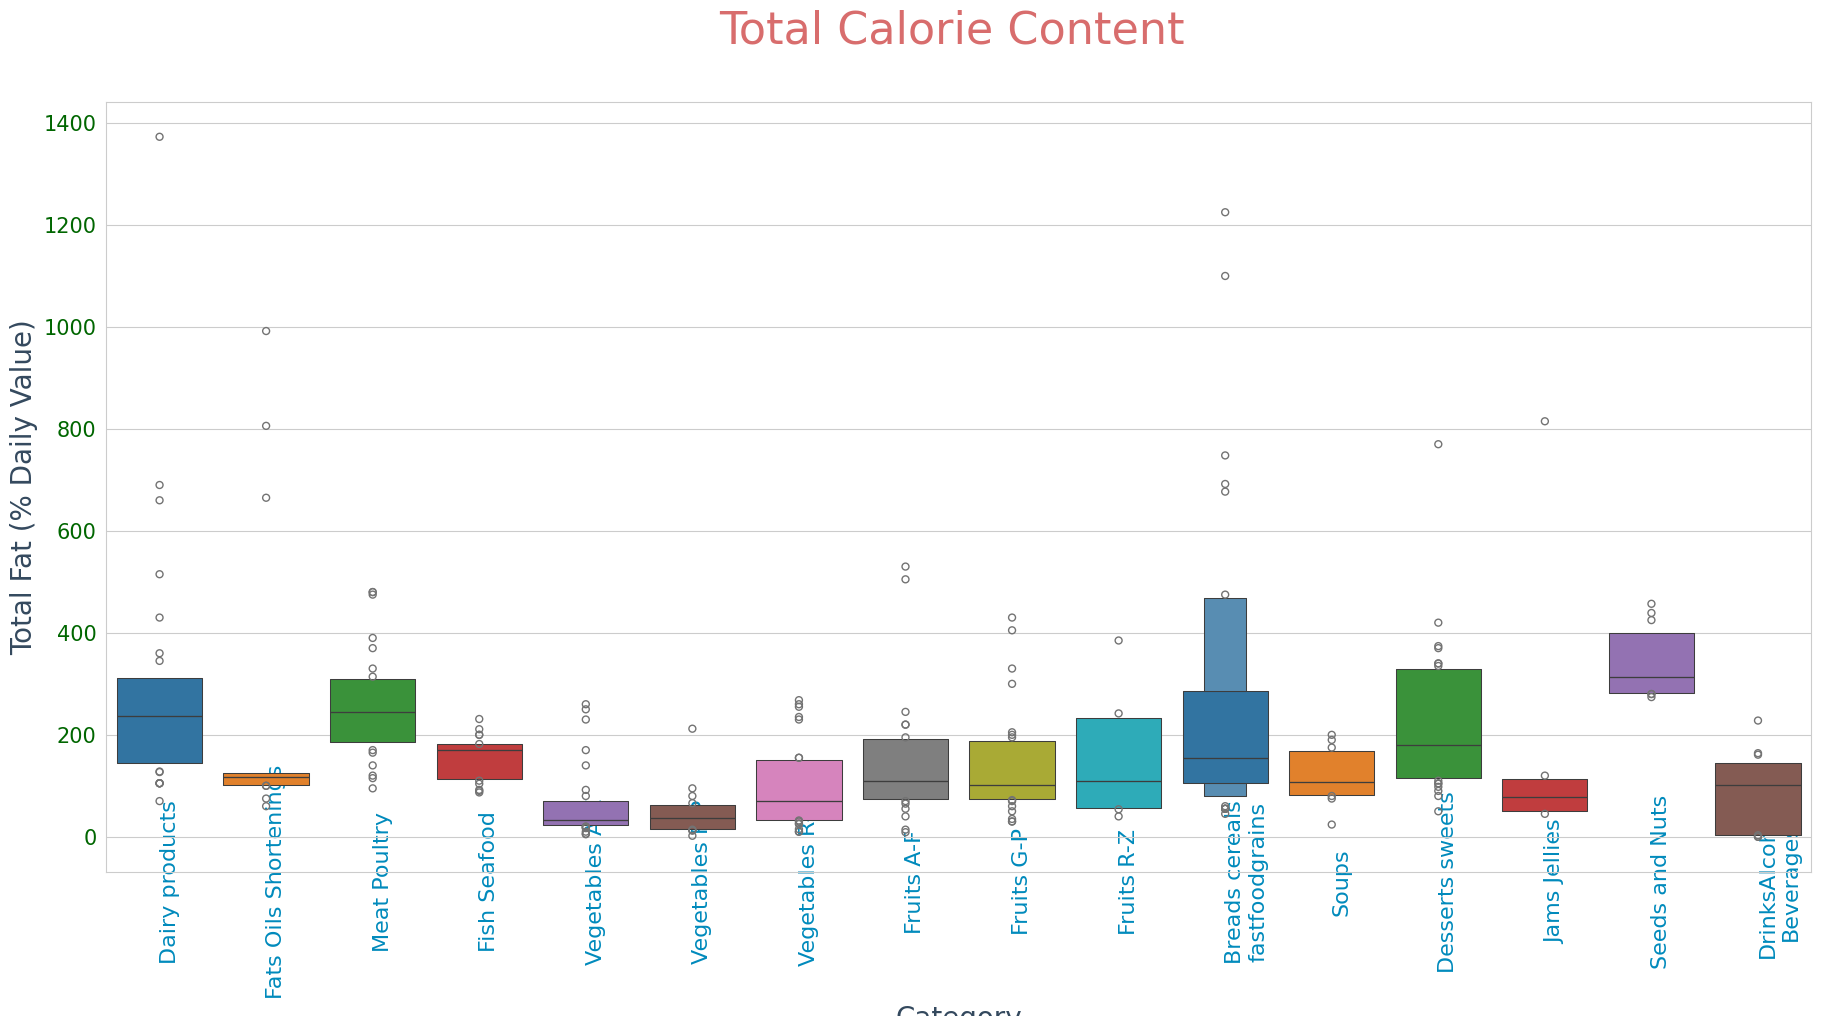

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=nutrients, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Total Calorie Content \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20)
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation=90, wrap=True)
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

# Train the model